## DAT405 - Assignment 1

### Name1: Meng Yuan

### Name2: Tomas Ekholm

### Group: 71

**Statement: We devote 20 hours each person working on this assignment.**

In [1]:
# imports part
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import leastsq

### 1. Download some data related to GDP per capita and life expectancy.

In [2]:
# import data set
df = pd.read_csv (r'/Users/mengyuan/Desktop/master_materials/intro/ass1/life-expectancy-vs-gdp-per-capita.csv')
df

,Entity,Code,Year,Life expectancy,GDP per capita,145446-annotations,"Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.638,1156.0,NaN,7752117.0,NaN
2,Afghanistan,AFG,1951,27.878,1170.0,NaN,7840151.0,NaN
3,Afghanistan,AFG,1952,28.361,1189.0,NaN,7935996.0,NaN
4,Afghanistan,AFG,1953,28.852,1240.0,NaN,8039684.0,NaN
...,...,...,...,...,...,...,...,...
60061,Zimbabwe,ZWE,1948,NaN,NaN,NaN,2624453.0,NaN
60062,Zimbabwe,ZWE,1949,NaN,NaN,NaN,2681604.0,NaN
60063,Zimbabwe,ZWE,2020,NaN,NaN,NaN,14862927.0,NaN
60064,Zimbabwe,ZWE,2021,NaN,NaN,NaN,15092171.0,NaN


In [3]:
#extract data with country Name, Year, Life expectancy and GDP per capita and population
df_new = pd.DataFrame(df, columns=['Entity','Year','Life expectancy','GDP per capita', 'Total population (Gapminder, HYDE & UN)'])

#Weed out/filter NaN data
df_new = df_new.dropna()

# exclude all continents names as they are not countries
df_new = df_new[(df_new['Entity']!='Africa')&(df_new['Entity']!='Asia')&(df_new['Entity']!='Europe')&(df_new['Entity']!='North America')&(df_new['Entity']!='Oceania')&(df_new['Entity']!='South America')&(df_new['Entity']!='World')]

df_new

,Entity,Year,Life expectancy,GDP per capita,"Total population (Gapminder, HYDE & UN)"
1,Afghanistan,1950,27.638,1156.0000,7752117.0
2,Afghanistan,1951,27.878,1170.0000,7840151.0
3,Afghanistan,1952,28.361,1189.0000,7935996.0
4,Afghanistan,1953,28.852,1240.0000,8039684.0
5,Afghanistan,1954,29.350,1245.0000,8151316.0
...,...,...,...,...,...
59870,Zimbabwe,2014,58.410,1594.0000,13586710.0
59871,Zimbabwe,2015,59.534,1560.0000,13814642.0
59872,Zimbabwe,2016,60.294,1534.0000,14030338.0
59873,Zimbabwe,2017,60.812,1582.3662,14236599.0


**a. Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [1p]**



/opt/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


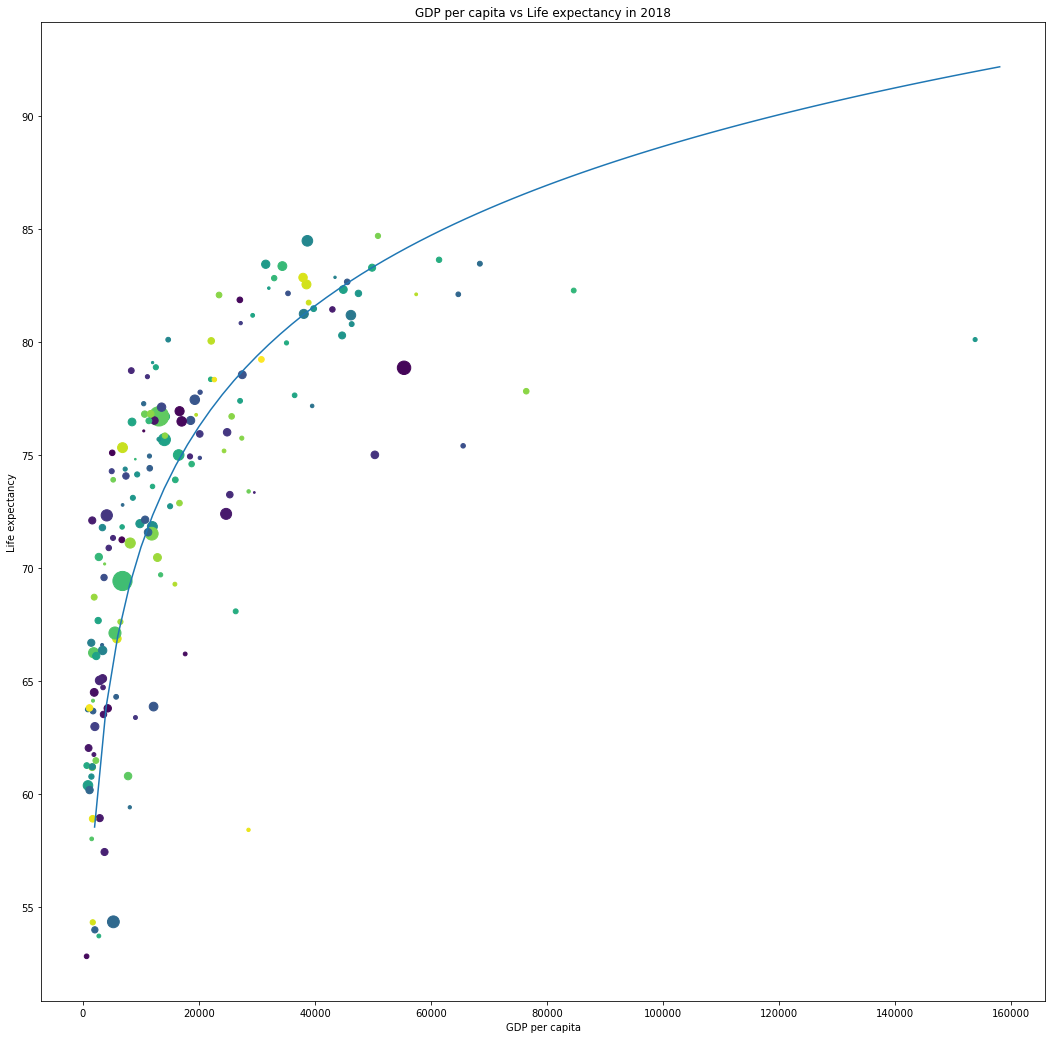

In [4]:
# draw a scatter plot only based on Year 2018
dataset = pd.DataFrame(df_new.loc[(df_new['Year']==2018)], columns=['Entity','Life expectancy','GDP per capita', 'Total population (Gapminder, HYDE & UN)'])

country_names = np.unique(dataset['Entity']) #in case any duplicate countries
colors = np.random.rand(len(country_names))

plt.figure(figsize=(18,18))

plt.scatter(dataset['GDP per capita'], 
            dataset['Life expectancy'], 
            c=colors, s=(0.0001*dataset['Total population (Gapminder, HYDE & UN)'])**0.5)

x1 = np.arange(0,160000,2000)
y1 = 7.7*np.log(x1)
plt.plot(x1,y1,label='Fitting function: y = 7.7log(x)')

plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy")
plt.title('GDP per capita vs Life expectancy in 2018')

plt.show()

**b. Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained. [1p]**

**Answer:** 
It seems reasonable as first of all, there is no doubt that with the increase in GDP per capita, people’s lives will be better, and life expectancy will definitely increase. However, life expectancy is also limited by some other factors, such as the level of medical development, so life expectancy will not keep increasing with GDP per capita infinitely. It will gradually tend to a constant value. The data on the diagram also conforms to the logarithmic performance. 

### Answer these questions:

**c. Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why. [0.5p]**

**Answer:**

Yes we did. We only use 'GDP per capita', 'Life expectancy' and  'Population' data for countries in 2018 and None of them is NaN. 

Reason: We only want to see relationship between 'GDP per capita' and 'Life expectancy' if there is no entry in any of these columns the data doesn't fit our purpose.

**d. Which countries have a life expectancy higher than one standard deviation above the mean? [0.5p]**

**Answer:**
Australia, Austria, Belgium, Canada, Cyprus, Denmark, Finland, France, Germany, Greece, Hong Kong, Iceland, Ireland, Israel, Italy, Japan, Luxembourg, Malta, Netherland, New Zealand, Norway, Portugal, Singapore, Slovenia, South Korea, Spain, Sweden, Switzerland, United Kingdom

In [5]:
country_name_list = dataset['Entity'].values.tolist()
Life_expectancy_list = dataset['Life expectancy'].values.tolist()
GDP_list = dataset['GDP per capita'].values.tolist()
population_list = dataset['Total population (Gapminder, HYDE & UN)'].values.tolist()


#mean of Life expectancy
mean_of_LE = np.mean(Life_expectancy_list)
#standard deviation of Life expectancy
std_of_LE = np.std(Life_expectancy_list)
# print(std_of_LE)

#calculate overall GDP
all_GDP_list = []
for i in range(len(Life_expectancy_list)):
    all_GDP_list.append(GDP_list[i]*population_list[i])

#mean of GDP per capita
mean_of_GDP = np.mean(GDP_list)
#standard deviation of GDP per capita
std_of_GDP = np.std(GDP_list)

#mean of overall GDP
mean_of_overall_GDP = np.mean(all_GDP_list)
#standard deviation of overall GDP
std_of_overall_GDP = np.std(all_GDP_list)

Answer1 = []
for i in range(len(Life_expectancy_list)):
    if Life_expectancy_list[i] - mean_of_LE >= std_of_LE: 
        Answer1.append(country_name_list[i])

print(Answer1)

['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']


**e. Which countries have high life expectancy but have low GDP? [0.5p]**

**Answer:**

In this question we define "high life expectancy" as being higher than 0.3(times the standard deviation) above the mean and "low GDP" as lower than 0.3(times the standard deviation) below the mean. To get our result we extract High_LE_list and Low_GDP_list to see if the data intersects. The resulting countries that fit the  criteria are **Barbados, North Macedonia, Montenegro, Saint Lucia, Malta.** and **Iceland** Worth nothing is that they are all countries with a small population.

In [6]:
High_LE_list = []
for i in range(len(Life_expectancy_list)):
    if Life_expectancy_list[i] - mean_of_LE >= 0.3*std_of_LE: 
        High_LE_list.append(country_name_list[i])

# print(High_LE_list)

Low_GDP_list = []
for i in range(len(all_GDP_list)):
    if mean_of_overall_GDP - all_GDP_list[i] >= 0.3*std_of_overall_GDP: 
        Low_GDP_list.append(country_name_list[i])

# print(Low_GDP_list)

Answer2 = list(set(High_LE_list).intersection(set(Low_GDP_list)))
print(Answer2)

['Iceland', 'North Macedonia', 'Malta', 'Barbados', 'Saint Lucia', 'Montenegro']


**f. Does every strong economy (normally indicated by GDP) have high life expectancy? [1p]**

**Answer:**

In this question we define "strong ecomomy" as GDP per capita higher than one standard deviation above the mean, and "high life expectancy" as life expectancy also higher than one standard deviation above the mean, same as in question d. In this case, we extract those countries in High_GDP_list while not in high life expectancy list, which indicates not every strong economy have high life expectancy, in this case, they are **China, India, Russia, Indonesia, United States**, and **Brazil**. This is 6 of the worlds top 9 most populous countries. In essence these countries are opposite to the ones we found in in question h.

In [7]:
High_overall_GDP_list = []

for i in range(len(all_GDP_list)):
    if all_GDP_list[i] - mean_of_overall_GDP >= std_of_overall_GDP: 
        High_overall_GDP_list.append(country_name_list[i])

Answer3 = list(set(High_overall_GDP_list).difference(set(Answer1)))
print(Answer3)

['China', 'Russia', 'Indonesia', 'Brazil', 'India', 'United States']


**g. Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f. [1p]**

**Answer:**

The countries that would have been found if using GDP per capita instead of GDP are the following. **Qatar, Bahrain, United States, Kuwait,
United Arab Emirates, Saudi Arabia and Taiwan**. This is an entirely different set of countries. The only overlap is **The United States**. So how do they differ? Well the common denominator in the first set is that they are very populous, why does this matter? Because it drives up the GDP while not necessarily doing anything for the GDP per capita. In the second set of countries 6 out of the 8 countries are gulf-states with huge oil reserves and a low population. Is any of the measurements better than the other? Well that would depend on the purpose. Both of them highlight two different kinds of "wealthy" countries, so is there any commonality between these groups? Without looking at data one speculation is that intra-country inequality in the distribution of wealth is the reason both these different groups of countries makes it onto this dubious list. Something well worth looking into.

In [8]:
High_GDP_list = []

for i in range(len(GDP_list)):
    if GDP_list[i] - mean_of_GDP >= std_of_GDP: 
        High_GDP_list.append(country_name_list[i])

Answer4 = list(set(High_GDP_list).difference(set(Answer1)))
print(Answer4)

['Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Kuwait', 'Bahrain', 'Taiwan', 'United States']


### 2. Download some other data sets, e.g. related to happiness and life satisfaction, trust, corruption, etc.

**a. Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [2.5p]**

**Answer:**


In [9]:
#In first section we compare Life satisfaction/Hapiness and Life Expectancy

# import dataset
df2 = pd.read_csv (r'/Users/mengyuan/Desktop/master_materials/intro/ass1/life-satisfaction-vs-life-expectancy.csv')
#extract data with country Name, Year, Life expectancy and Life satisfaction and population
df_new2 = pd.DataFrame(df2, columns=['Entity','Year','Estimates, 1950 - 2020: Annually interpolated demographic indicators - Life expectancy at birth, both sexes combined (years)','Life satisfaction in Cantril Ladder (World Happiness Report 2021)', 'Total population (Gapminder, HYDE & UN)'])

#Weed out/filter NaN data
df_new2 = df_new2.dropna()

# exclude all continents names as they are not countries
df_new2 = df_new2[(df_new2['Entity']!='Africa')&(df_new2['Entity']!='Asia')&(df_new2['Entity']!='Europe')&(df_new2['Entity']!='North America')&(df_new2['Entity']!='Oceania')&(df_new2['Entity']!='South America')&(df_new2['Entity']!='World')]

df_new2

,Entity,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Life expectancy at birth, both sexes combined (years)",Life satisfaction in Cantril Ladder (World Happiness Report 2021),"Total population (Gapminder, HYDE & UN)"
1,Afghanistan,1950.0,27.638,3.983,7752117.0
2,Afghanistan,1951.0,27.878,3.983,7840151.0
3,Afghanistan,1952.0,28.361,3.983,7935996.0
4,Afghanistan,1953.0,28.852,3.983,8039684.0
5,Afghanistan,1954.0,29.350,3.983,8151316.0
...,...,...,...,...,...
58282,Zimbabwe,2016.0,60.294,3.703,14030338.0
58283,Zimbabwe,2017.0,60.812,3.703,14236599.0
58284,Zimbabwe,2018.0,61.195,3.703,14438812.0
58285,Zimbabwe,2019.0,61.490,3.703,14645473.0


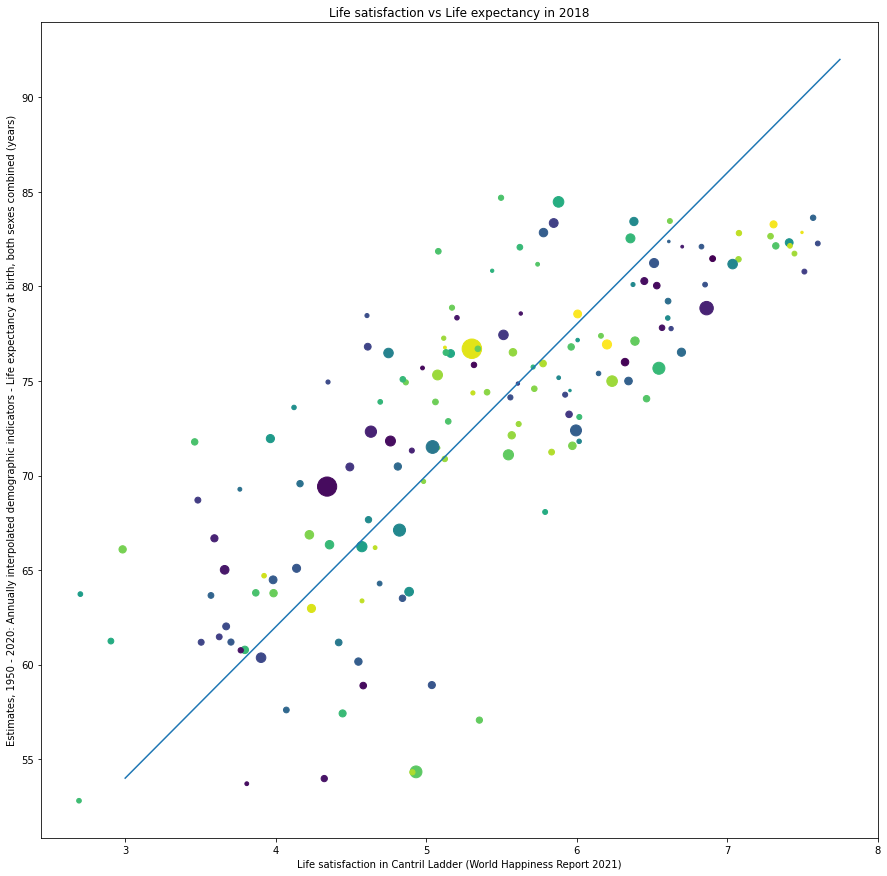

In [10]:
# draw a scatter plot only based on Year 2018
dataset2 = pd.DataFrame(df_new2.loc[(df_new2['Year']==2018.0)], columns=['Entity','Year','Estimates, 1950 - 2020: Annually interpolated demographic indicators - Life expectancy at birth, both sexes combined (years)','Life satisfaction in Cantril Ladder (World Happiness Report 2021)', 'Total population (Gapminder, HYDE & UN)'])

country_names2 = np.unique(dataset2['Entity']) #in case any duplicate countries
colors2 = np.random.rand(len(country_names2))

plt.figure(figsize=(15,15))

plt.scatter(dataset2['Life satisfaction in Cantril Ladder (World Happiness Report 2021)'], 
            dataset2['Estimates, 1950 - 2020: Annually interpolated demographic indicators - Life expectancy at birth, both sexes combined (years)'], 
            c=colors2, s=(0.0001*dataset2['Total population (Gapminder, HYDE & UN)'])**0.5)

x2 = np.arange(3,8,0.25)
y2 = 8*x2+30
plt.plot(x2,y2,label='Fitting function: y = 8x+30')

plt.xlabel("Life satisfaction in Cantril Ladder (World Happiness Report 2021)")
plt.ylabel("Estimates, 1950 - 2020: Annually interpolated demographic indicators - Life expectancy at birth, both sexes combined (years)")
plt.title('Life satisfaction vs Life expectancy in 2018')

plt.show()

In [11]:
#In second section we compare GDP per capita and trust in government
# import dataset and keep trust only
df3 = pd.read_csv (r'/Users/mengyuan/Desktop/master_materials/intro/ass1/share-who-trust-government.csv')
df3

,Entity,Code,Year,Share of people who trust their national government
0,Afghanistan,AFG,2018,45.195291
1,Albania,ALB,2018,46.444114
2,Algeria,DZA,2018,38.059310
3,Argentina,ARG,2018,31.924071
4,Armenia,ARM,2018,79.742444
...,...,...,...,...
129,Uzbekistan,UZB,2018,99.219376
130,Venezuela,VEN,2018,35.704270
131,Yemen,YEM,2018,35.107362
132,Zambia,ZMB,2018,56.703003


In [12]:
#As we only have year(2018) and trust data in this dataset, we have to merge it with "dataset" appreared before
df_new3 = pd.merge(dataset, pd.DataFrame(df3, columns=['Entity','Share of people who trust their national government']), how='left', on='Entity')

#Weed out/filter NaN data
df_new3 = df_new3.dropna()

# exclude all continents names as they are not countries
df_new3 = df_new3[(df_new3['Entity']!='Africa')&(df_new3['Entity']!='Asia')&(df_new3['Entity']!='Europe')&(df_new3['Entity']!='North America')&(df_new3['Entity']!='Oceania')&(df_new3['Entity']!='South America')&(df_new3['Entity']!='World')]
df_new3

,Entity,Life expectancy,GDP per capita,"Total population (Gapminder, HYDE & UN)",Share of people who trust their national government
0,Afghanistan,64.486,1934.5550,37171922.0,45.195291
1,Albania,78.458,11104.1665,2882735.0,46.444114
2,Algeria,76.693,14228.0250,42228415.0,38.059310
4,Argentina,76.520,18556.3831,44361150.0,31.924071
5,Armenia,74.945,11454.4251,2951741.0,79.742444
...,...,...,...,...,...
160,Uzbekistan,71.573,11220.3702,32476232.0,99.219376
161,Venezuela,72.128,10709.9506,28887117.0,35.704270
163,Yemen,66.096,2284.8899,28498683.0,35.107362
164,Zambia,63.510,3534.0337,17351714.0,56.703003


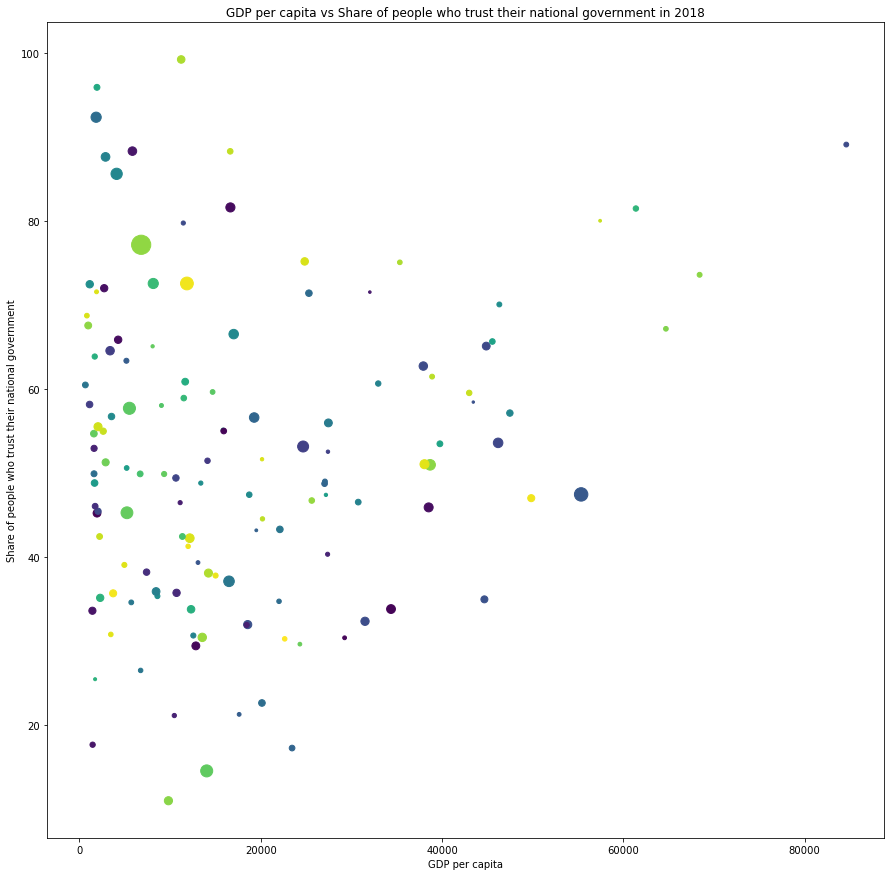

In [13]:
country_names3 = np.unique(df_new3['Entity']) #in case any duplicate countries
colors3 = np.random.rand(len(country_names3))

plt.figure(figsize=(15,15))

plt.scatter(df_new3['GDP per capita'], 
            df_new3['Share of people who trust their national government'], 
            c=colors3, s=(0.0001*df_new3['Total population (Gapminder, HYDE & UN)'])**0.5)

# x1 = np.arange(0,160000,2000)
# y1 = 7.7*np.log(x1)
# plt.plot(x1,y1)

plt.xlabel("GDP per capita")
plt.ylabel("Share of people who trust their national government")
plt.title('GDP per capita vs Share of people who trust their national government in 2018')

plt.show()

**b. Discuss any observations that you make, or insights obtained, from the data visualisations. [2p]**

**Answer:**

Life satisfaction and Life expectancy clearly have a strong linear relationship. So it is definitely plausible to conclude that either we are more satisfied from the prospect of a long life or that we simply live longer when we are happy. Which causes which can be hard to say. It would also be wise to investigate if possible other factors could impact both. For example a wealthy society might be able offer its citizens both amenities and entertainment that increase Life satisfaction as well as Good and well funded health-care systems that increase Life expectancy. Further analysis can be done here if given time. 

Life satisfaction vs Life expectancy, we extract data on life expectancy, happiness and population in 2018, have de-duplication on dataset as before, and
draw a trend line.

There is no strong correlation between GDP per capita and Share of people who trust their national government. It seems that whether people trust their government or not does it is not correlated with the macroeconomic situation and vice versa. Contrary to our previous predictions.